In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv("archive/US_Accidents_March23.csv")
df = pd.read_csv("archive/US_Accidents_March23.csv",parse_dates=['Start_Time', 'End_Time'])


<h1>Dataset Inspection</h1>

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

<h2>Basic EDA</h2>

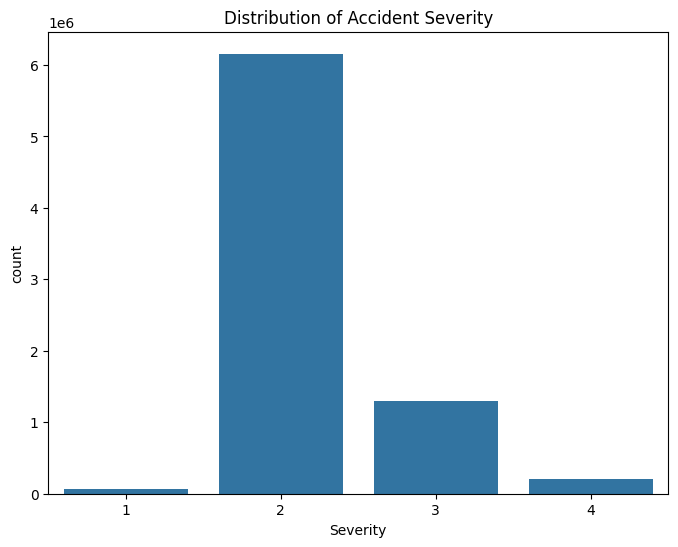

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x='Severity', data=df)
plt.title("Distribution of Accident Severity")
plt.show()
     

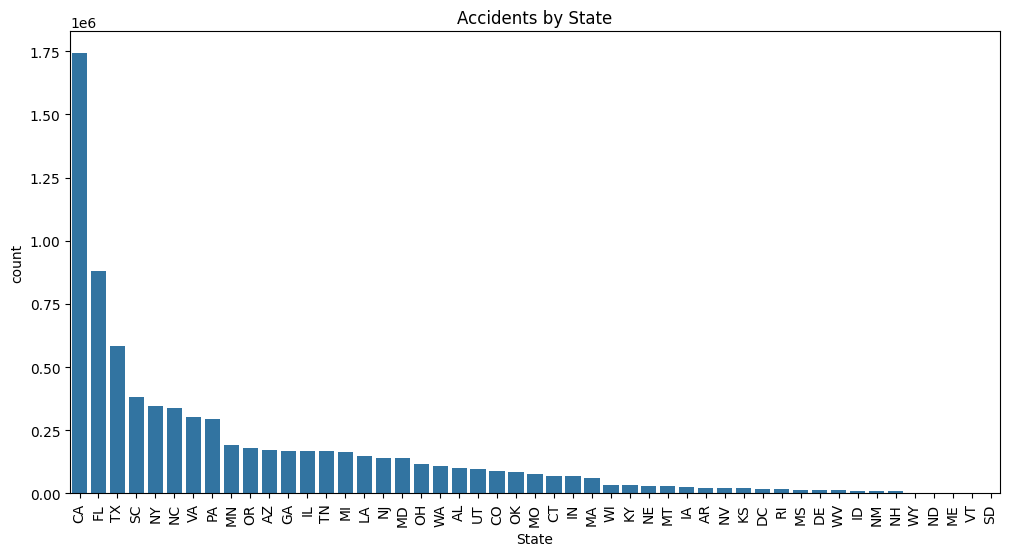

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Accidents by State")
plt.show()

<h2>Inspecting Null Values</h2>

In [8]:
df.isnull().sum()


ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

<strong>Null values in percentages</strong>

In [9]:
(df.isnull().sum().sort_values(ascending=False) / df.shape[0]) * 100

ID                        0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  44.029355
End_Lng                  44.029355
Distance(mi)              0.000000
Description               0.000065
Street                    0.140637
City                      0.003274
County                    0.000000
State                     0.000000
Zipcode                   0.024779
Country                   0.000000
Timezone                  0.101030
Airport_Code              0.292881
Weather_Timestamp         1.555666
Temperature(F)            2.120143
Wind_Chill(F)            25.865904
Humidity(%)               2.253301
Pressure(in)              1.820288
Visibility(mi)            2.291524
Wind_Direction            2.267043
Wind_Speed(mph)           7.391355
Precipitation(in)        28.512858
Weather_Condition   

In [10]:
pd.reset_option('display.max_rows', None)


<strong>Checking percentage of false values in boolean columns</strong>

In [11]:
bool_cols = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 
        'Traffic_Signal', 'Turning_Loop']

false_counts = (df[bool_cols] == False).sum().sort_values(ascending = False)


for col, count in false_counts.items():
    print(f"False entries in {col} : {count}  => {(count/df.shape[0])*100:.2f}")

False entries in Turning_Loop : 7728394  => 100.00
False entries in Roundabout : 7728145  => 100.00
False entries in Bump : 7724880  => 99.95
False entries in Traffic_Calming : 7720796  => 99.90
False entries in No_Exit : 7708849  => 99.75
False entries in Give_Way : 7691812  => 99.53
False entries in Railway : 7661415  => 99.13
False entries in Amenity : 7632060  => 98.75
False entries in Station : 7526493  => 97.39
False entries in Stop : 7514023  => 97.23
False entries in Junction : 7157052  => 92.61
False entries in Crossing : 6854631  => 88.69
False entries in Traffic_Signal : 6584622  => 85.20


<strong>Since maximum values are false they do not impact the target variable</strong>

In [12]:
df.shape[0]

7728394

<h1>Data Cleaning and Feature Selection</h1>

<strong> Dropping the boolean values which are not useful</strong>

In [13]:
#These boolean columns are almost completely false so they are not useful apart from last three 3 columsn 


df_bool_dropped = df.drop(['Amenity','Bump','Give_Way','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Turning_Loop'],axis='columns')


In [14]:
df_bool_dropped.shape

(7728394, 36)

In [15]:
null_percentage = (df_bool_dropped.isnull().sum()/df_bool_dropped.shape[0]) * 100
null_percentage.sort_values(ascending = False)

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Crossing                  0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Traffic_Signal            0.000000
Junction                  0.000000
Distance(mi)        

In [16]:
df_drop = df_bool_dropped.drop(['End_Lat','End_Lng'],axis = 'columns')

In [17]:
df_drop.shape

(7728394, 34)

<strong>Converting Boolean columns into int so that it will be eaiser to segregate  numerical and categorical columns</strong>

In [18]:
bool_cols = ['Junction', 'Crossing', 'Traffic_Signal']
df_drop[bool_cols] = df_drop[bool_cols].astype(int)


<strong>Number of unique data points in each column </strong>

In [19]:
for col in df_drop.columns:
    unique_count = df_drop[col].nunique()
    print(f"Unique entries in {col} : {unique_count}")


Unique entries in ID : 7728394
Unique entries in Source : 3
Unique entries in Severity : 4
Unique entries in Start_Time : 6131796
Unique entries in End_Time : 6705355
Unique entries in Start_Lat : 2428358
Unique entries in Start_Lng : 2482533
Unique entries in Distance(mi) : 22382
Unique entries in Description : 3761578
Unique entries in Street : 336306
Unique entries in City : 13678
Unique entries in County : 1871
Unique entries in State : 49
Unique entries in Zipcode : 825094
Unique entries in Country : 1
Unique entries in Timezone : 4
Unique entries in Airport_Code : 2045
Unique entries in Weather_Timestamp : 941331
Unique entries in Temperature(F) : 860
Unique entries in Wind_Chill(F) : 1001
Unique entries in Humidity(%) : 100
Unique entries in Pressure(in) : 1144
Unique entries in Visibility(mi) : 92
Unique entries in Wind_Direction : 24
Unique entries in Wind_Speed(mph) : 184
Unique entries in Precipitation(in) : 299
Unique entries in Weather_Condition : 144
Unique entries in Cro

<strong>Since there is only one unique value in country it is not useful</strong>

In [20]:
df_drop = df_drop.drop(['Country'],axis='columns')

In [21]:
df_drop.shape

(7728394, 33)

In [22]:
# its just the time when weather was recorded so not useful
df_drop = df_drop.drop(['Weather_Timestamp'],axis='columns')

In [23]:
df_drop = df_drop.drop(['ID'],axis='columns')

In [24]:
df_drop.shape

(7728394, 31)

In [25]:
df_drop.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

<h2>Corelation Matrix</h2>

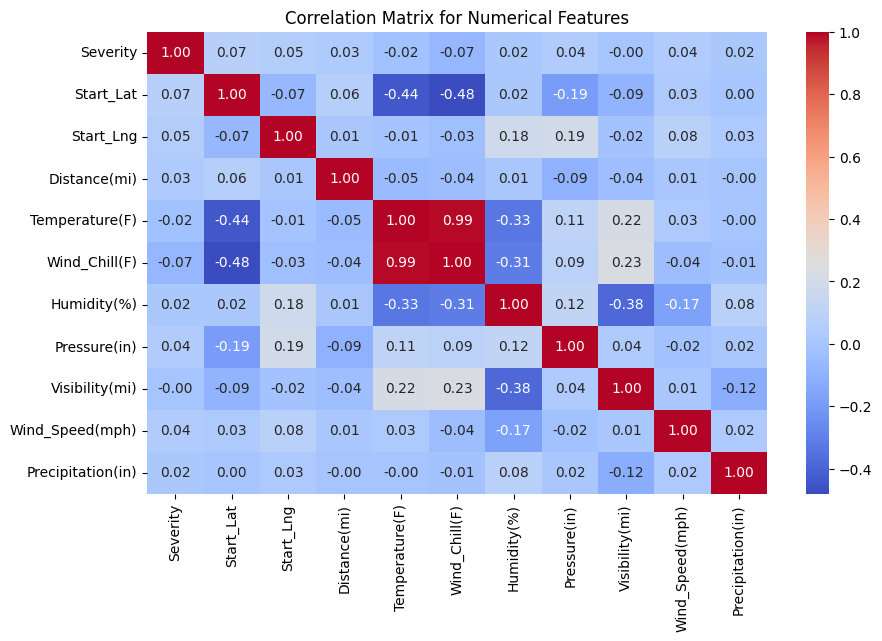

In [26]:
plt.figure(figsize=(10,6))
corr_matrix = df_drop[['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
                       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
                       'Precipitation(in)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features')
plt.show()

<strong>Insights from the corelation matrix: <ol><li>There's a very high positive correlation (0.99) between Temperature(F) and Wind_Chill(F) so using both the features would be redundant any one is sufficient  </li> <li>Start_Lat and Start_Lng exhibit very low correlations with Severity we can ommit them</li></ol><strong>

In [27]:
null_percentage = (df_bool_dropped.isnull().sum()/df_bool_dropped.shape[0]) * 100
null_percentage.sort_values(ascending = False)

End_Lat                  44.029355
End_Lng                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Civil_Twilight            0.300787
Sunrise_Sunset            0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
Crossing                  0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Traffic_Signal            0.000000
Junction                  0.000000
Distance(mi)        

<h2>Removing Outlier </h2>

In [28]:
def remove_outliers_iqr(df, numeric_cols):

    for col in numeric_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [29]:
numeric_cols = ["Precipitation(in)", "Wind_Speed(mph)", "Visibility(mi)", "Pressure(in)",
                "Humidity(%)", "Wind_Chill(F)", "Temperature(F)", "Distance(mi)", "Start_Lng", "Start_Lat"]

df_drop = remove_outliers_iqr(df_drop, numeric_cols)

<strong> null values after removing outliers </strong>

In [30]:
null_percentage = (df_drop.isnull().sum()/df_drop.shape[0]) * 100
null_percentage.sort_values(ascending = False)

Astronomical_Twilight    0.327472
Sunrise_Sunset           0.327472
Nautical_Twilight        0.327472
Civil_Twilight           0.327472
Street                   0.196378
Weather_Condition        0.161843
City                     0.003047
Wind_Direction           0.000492
Description              0.000092
Traffic_Signal           0.000000
Junction                 0.000000
Humidity(%)              0.000000
Crossing                 0.000000
Precipitation(in)        0.000000
Wind_Speed(mph)          0.000000
Visibility(mi)           0.000000
Pressure(in)             0.000000
Source                   0.000000
Wind_Chill(F)            0.000000
Severity                 0.000000
Airport_Code             0.000000
Timezone                 0.000000
Zipcode                  0.000000
State                    0.000000
County                   0.000000
Distance(mi)             0.000000
Start_Lng                0.000000
Start_Lat                0.000000
End_Time                 0.000000
Start_Time    

In [31]:
# for col in numeric_cols:
#     df_drop[col] = df_drop[col].fillna(df_drop[col].mean())


In [32]:
df_drop[numeric_cols].isnull().sum()

Precipitation(in)    0
Wind_Speed(mph)      0
Visibility(mi)       0
Pressure(in)         0
Humidity(%)          0
Wind_Chill(F)        0
Temperature(F)       0
Distance(mi)         0
Start_Lng            0
Start_Lat            0
dtype: int64

<strong> splitting the datetime columns into multiple columns </strong>

In [33]:
df_drop['Start_Time'] = df_drop['Start_Time'].str.replace(r'\.\d+', '', regex=True)
df_drop['End_Time'] = df_drop['End_Time'].str.replace(r'\.\d+', '', regex=True)

In [34]:
df_drop['Start_Time'] = pd.to_datetime(df_drop['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_drop['End_Time'] = pd.to_datetime(df_drop['End_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [35]:
df_drop['Year'] = df_drop['Start_Time'].dt.year
df_drop['Month'] = df_drop['Start_Time'].dt.month
df_drop['Day'] = df_drop['Start_Time'].dt.day
df_drop['Time_S'] = df_drop['Start_Time'].dt.hour
df_drop['Weekday'] = df_drop['Start_Time'].dt.weekday

df_drop['Duration'] = (df_drop['End_Time'] - df_drop['Start_Time']).dt.total_seconds()

In [36]:
df_drop.columns

Index(['Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)',
       'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Crossing', 'Junction', 'Traffic_Signal',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Time_S', 'Weekday',
       'Duration'],
      dtype='object')

In [37]:
df_drop = df_drop.drop(['Start_Time', 'End_Time'],axis='columns')
df_drop.columns

Index(['Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
       'Description', 'Street', 'City', 'County', 'State', 'Zipcode',
       'Timezone', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Crossing',
       'Junction', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight', 'Year', 'Month', 'Day',
       'Time_S', 'Weekday', 'Duration'],
      dtype='object')

In [38]:
df_drop.head(30)

,Source,Severity,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Time_S,Weekday,Duration
27,Source2,2,39.775303,-84.200523,0.00,Accident on Helena St at OH-48 Main St.,W Helena St,Dayton,Montgomery,OH,...,Day,Day,Day,Day,2016,2,8,14,0,2700.0
30,Source2,2,40.081459,-83.122398,0.01,Accident on Frantz Rd Southbound at Bradenton ...,Frantz Rd,Dublin,Franklin,OH,...,Day,Day,Day,Day,2016,2,8,16,0,1800.0
363,Source2,2,38.581139,-82.004562,0.01,Accident on US-35 US Highway 35 Northbound at ...,US Highway 35,Fraziers Bottom,Putnam,WV,...,Day,Day,Day,Day,2016,2,24,7,2,2700.0
408,Source2,3,39.596703,-84.238388,0.01,Accident on I-75 Northbound at Exit 41 Austin ...,I-75 S,Miamisburg,Montgomery,OH,...,Day,Day,Day,Day,2016,2,29,7,0,1800.0
461,Source2,2,39.758556,-84.177246,0.01,Accident on 5th St at Keowee St.,S Keowee St,Dayton,Montgomery,OH,...,Day,Day,Day,Day,2016,3,3,9,3,1800.0
590,Source2,2,38.843636,-82.216187,0.00,Accident on Hazel St at Circle Dr.,Circle Dr,Gallipolis,Gallia,OH,...,Day,Day,Day,Day,2016,3,10,15,3,1800.0
6040,Source2,2,38.510437,-121.464523,0.01,Slow traffic due to accident on 47th Ave Westb...,47th Ave,Sacramento,Sacramento,CA,...,Day,Day,Day,Day,2016,12,7,16,2,1754.0
6044,Source2,2,38.676666,-121.638069,0.01,Accident on County Hwy-22 Old River Rd Westbou...,County Road 22,West Sacramento,Yolo,CA,...,Night,Day,Day,Day,2016,12,7,16,2,1778.0
6051,Source2,2,38.538242,-121.473648,0.01,Shoulder blocked on exit ramp due to accident ...,CA-99 N,Sacramento,Sacramento,CA,...,Night,Night,Day,Day,2016,12,7,17,2,2681.0
6052,Source2,2,38.496086,-121.419502,0.01,Accident on Florin Rd Westbound at Rimrock Dr.,Rimrock Dr,Sacramento,Sacramento,CA,...,Night,Night,Night,Day,2016,12,7,18,2,2684.0


In [39]:
df_drop['Weekday'].value_counts()


Weekday
4    573636
2    540536
3    532151
1    528774
0    496438
5    321964
6    255330
Name: count, dtype: int64

In [40]:
# df_drop.columns

In [41]:
null_percentage = (df_drop.isnull().sum()/df_drop.shape[0]) * 100
null_percentage.sort_values(ascending = False)

Civil_Twilight           0.327472
Sunrise_Sunset           0.327472
Astronomical_Twilight    0.327472
Nautical_Twilight        0.327472
Street                   0.196378
Weather_Condition        0.161843
City                     0.003047
Wind_Direction           0.000492
Description              0.000092
Crossing                 0.000000
Junction                 0.000000
Traffic_Signal           0.000000
Source                   0.000000
Precipitation(in)        0.000000
Month                    0.000000
Day                      0.000000
Time_S                   0.000000
Weekday                  0.000000
Year                     0.000000
Visibility(mi)           0.000000
Wind_Speed(mph)          0.000000
Severity                 0.000000
Pressure(in)             0.000000
Humidity(%)              0.000000
Wind_Chill(F)            0.000000
Temperature(F)           0.000000
Airport_Code             0.000000
Timezone                 0.000000
Zipcode                  0.000000
State         

In [42]:

df_drop.shape

(3248829, 35)

<strong> Since there are less number of null values in columns we can drop those datapoints </strong>

In [43]:
df_drop = df_drop.dropna(subset=['Weather_Condition', 'Wind_Direction'])

In [44]:
null_percentage = (df_drop.isnull().sum()/df_drop.shape[0]) * 100
null_percentage[null_percentage > 0].sort_values(ascending = False)

Sunrise_Sunset           0.327018
Civil_Twilight           0.327018
Nautical_Twilight        0.327018
Astronomical_Twilight    0.327018
Street                   0.196389
City                     0.003052
Description              0.000092
dtype: float64

In [45]:
df_drop.dropna(subset=['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Street','City','Description'], inplace=True)


In [46]:
null_percentage = (df_drop.isnull().sum()/df_drop.shape[0]) * 100
null_percentage[null_percentage > 0].sort_values(ascending = False)

Series([], dtype: float64)

In [47]:
df_drop.shape

(3226663, 35)

<strong>Cleaning Wind Direction Columns </strong>

In [48]:
df_drop["Wind_Direction"].unique()

array(['WNW', 'West', 'E', 'SE', 'W', 'East', 'NNE', 'NNW', 'ENE', 'NW',
       'South', 'SSW', 'NE', 'SSE', 'ESE', 'SW', 'Variable', 'S', 'VAR',
       'CALM', 'WSW', 'N', 'North'], dtype=object)

In [49]:
df_drop = df_drop.replace({
    'Wind_Direction': {
        'South': 'S',
        'North': 'N',
        'Calm': 'CALM',
        'East': 'E',
        'West': 'W',
        'Variable': 'VAR'
    }
})

In [50]:
df_drop["Wind_Direction"].unique()

array(['WNW', 'W', 'E', 'SE', 'NNE', 'NNW', 'ENE', 'NW', 'S', 'SSW', 'NE',
       'SSE', 'ESE', 'SW', 'VAR', 'CALM', 'WSW', 'N'], dtype=object)

<strong>Inspecting Description column</strong>

In [51]:
df_drop['Description']

27                   Accident on Helena St at OH-48 Main St.
30         Accident on Frantz Rd Southbound at Bradenton ...
363        Accident on US-35 US Highway 35 Northbound at ...
408        Accident on I-75 Northbound at Exit 41 Austin ...
461                         Accident on 5th St at Keowee St.
                                 ...                        
7728387                                 At CA-55 - Accident.
7728389                             At Market St - Accident.
7728390      At Camino Del Rio/Mission Center Rd - Accident.
7728391    At Glassell St/Grand Ave - Accident. in the ri...
7728392       At CA-90/Marina Fwy/Jefferson Blvd - Accident.
Name: Description, Length: 3226663, dtype: object

<strong>Since description contains some useful content we can use vector embeddings to get semantic information</strong>

In [52]:
import fasttext
import fasttext.util
# fasttext.util.download_model('en', if_exists='ignore')
model_en = fasttext.load_model('cc.en.300.bin')

<strong>I have used fasttext because it is very quick and ideal for large datasets</strong>

In [53]:
def get_embedding(text):
    return model_en.get_sentence_vector(text)

In [54]:
df_drop['Description_embeddings'] = df_drop['Description'].apply(get_embedding)

In [55]:
# df_drop['Description'].info()

In [56]:
# df_drop['Description'].isnull().sum()

In [57]:
# df_drop.dropna(subset=['Description'], inplace=True)


In [58]:
# df_drop['Description'].isnull().sum()

In [59]:
# df_drop['Description_embeddings'] = df_drop['Description'].apply(get_embedding)

In [60]:
df_drop['Description_embeddings'][:5]

27     [0.013464432, 0.046787005, 0.026794016, 0.0368...
30     [0.009582213, 0.039973386, -0.0096881, -0.0049...
363    [-0.006095749, -0.002642335, 0.014200881, -0.0...
408    [0.008399671, 0.048438054, 0.0005265806, -0.01...
461    [0.016709683, 0.057730354, 0.020363579, 0.0133...
Name: Description_embeddings, dtype: object

In [61]:
df_drop['Description_embeddings'].iloc[0].shape

(300,)

<strong>We can use vector embeddings for weather condition also to get semantic information</strong>

In [62]:
df_drop['Weather_Condition'].unique()

array(['Mostly Cloudy', 'Overcast', 'Cloudy', 'Light Snow', 'Light Rain',
       'Clear', 'Fair', 'Partly Cloudy', 'Smoke',
       'Showers in the Vicinity', 'Light Rain with Thunder',
       'Thunder in the Vicinity', 'T-Storm', 'Thunder', 'Light Drizzle',
       'Light Freezing Rain', 'Scattered Clouds',
       'Light Freezing Drizzle', 'Light Ice Pellets', 'Rain', 'Drizzle',
       'Shallow Fog', 'Patches of Fog', 'N/A Precipitation',
       'Heavy T-Storm', 'Heavy Rain', 'Haze', 'Tornado',
       'Light Snow Shower', 'Wintry Mix', 'Rain Shower', 'Light Sleet',
       'Thunder / Wintry Mix', 'Freezing Rain', 'Fog',
       'Light Snow and Sleet', 'Mist', 'Blowing Dust',
       'Sand / Dust Whirlwinds', 'Light Rain Shower',
       'Sand / Dust Whirls Nearby', 'Rain and Sleet', 'Funnel Cloud',
       'Light Thunderstorms and Rain', 'Small Hail', 'Snow',
       'Light Rain Showers', 'Hail', 'Sleet', 'Heavy Drizzle', 'Squalls',
       'Widespread Dust'], dtype=object)

In [63]:
df_drop['Weather_Condition_embeddings'] = df_drop['Weather_Condition'].apply(get_embedding)

In [64]:
df_drop['Weather_Condition_embeddings']

27         [-0.05769518, 0.032789998, -0.089027524, 0.056...
30         [-0.08036636, -0.027058078, 0.018440805, 0.049...
363        [-0.09204537, -0.003009274, -0.11716455, -0.00...
408        [-0.08036636, -0.027058078, 0.018440805, 0.049...
461        [-0.08732875, 0.06886304, 0.10674752, 0.019409...
                                 ...                        
7728387    [-0.022462675, 0.011953461, -0.118578285, -0.0...
7728389    [-0.022462675, 0.011953461, -0.118578285, -0.0...
7728390    [-0.022462675, 0.011953461, -0.118578285, -0.0...
7728391    [-0.09273986, 0.035124853, -0.09774108, 0.0719...
7728392    [-0.022462675, 0.011953461, -0.118578285, -0.0...
Name: Weather_Condition_embeddings, Length: 3226663, dtype: object

In [65]:
df_drop.columns.shape

(37,)

In [66]:
df_drop.drop(columns = ['Weather_Condition','Description'],inplace = True)

In [67]:
# df_drop['Source'].unique().shape
# df_drop['Street'].unique().shape
# df_drop['City'].unique().shape
# df_drop['County'].unique().shape
# df_drop['Zipcode'].unique().shape
# df_drop['Airport_Code'].unique().shape
df_drop['State'].unique().shape

(49,)

In [68]:
df_drop.drop(columns = ['Street','City','County','Zipcode','Airport_Code'],inplace = True)

In [69]:
df_drop.columns.shape

(30,)

<strong>Segregating numerical and categorical features</strong>

In [70]:
numerical_features = df_drop.select_dtypes(include=['number']).columns.tolist()
categorical_features = df_drop.select_dtypes(exclude=['number']).columns.tolist()



In [71]:
len(numerical_features)

20

In [72]:
numerical_features

['Severity',
 'Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Crossing',
 'Junction',
 'Traffic_Signal',
 'Year',
 'Month',
 'Day',
 'Time_S',
 'Weekday',
 'Duration']

In [73]:
len(categorical_features)

10

In [74]:
categorical_features

['Source',
 'State',
 'Timezone',
 'Wind_Direction',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Description_embeddings',
 'Weather_Condition_embeddings']

In [75]:
categorical_features.remove('Description_embeddings')
categorical_features.remove('Weather_Condition_embeddings')

In [76]:
len(categorical_features)

8

<strong>Using only one tenth sample of the original data because of insufficient ram </strong>

In [77]:
sampled_data = df_drop.sample(frac=1/10)

<h3> OneHot Encoding of categorical features</h3>

In [78]:
def apply_one_hot_encoding(df, categorical_features):
    df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=False)
    return df_encoded


In [79]:
# df_drop.isnull().sum()
df_encoded = apply_one_hot_encoding(sampled_data,categorical_features)

<strong> Dropping the target variable</strong>

In [80]:
X = df_encoded.drop("Severity",axis='columns')

In [81]:
import numpy as np

In [82]:
y = df_encoded["Severity"]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

<strong> Flattening and poping out the vector embeddings</strong>

In [84]:
Description_embeddings = np.vstack(X_train.pop('Description_embeddings'))  
Weather_Condition_embeddings = np.vstack(X_train.pop('Weather_Condition_embeddings'))  

In [85]:
X_train.shape

(258132, 101)

In [86]:
# import numpy as 

In [87]:
print(df_encoded['Description_embeddings'].iloc[0].shape)


(300,)


<strong> Concatinating vector embeddings with other features </strong>

In [88]:
X_train_combined = np.concatenate([X_train.to_numpy(), Description_embeddings, Weather_Condition_embeddings], axis=1)

<h1>Training Decision Tree Classifier </h1>

In [89]:
from sklearn.tree import DecisionTreeClassifier
treeClassifier = DecisionTreeClassifier()

In [90]:
treeClassifier.fit(X_train_combined,y_train)

DecisionTreeClassifier()

In [91]:
from sklearn.metrics import accuracy_score
treeClassifier.score(X_train_combined,y_train)


0.9993569181658997

<h1> Accuracy on test set </h1>

In [92]:
from sklearn.metrics import accuracy_score


# numerical_and_ohe_columns_test = X_test.drop([ 'Description_embeddings', 'Weather_Condition_embeddings'], axis=1).values
Description_embeddings_test = np.vstack(X_test.pop('Description_embeddings'))  
Weather_Condition_embeddings_test = np.vstack(X_test.pop('Weather_Condition_embeddings'))  
X_test_combined = np.concatenate([X_test.to_numpy(), Description_embeddings_test, Weather_Condition_embeddings_test], axis=1)
y_pred = treeClassifier.predict(X_test_combined)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score:", accuracy)


Accuracy score: 0.9021446059441535


<h2>Hyperparameter tuning and Evaluating different models</h2>

In [99]:
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
model_params = {
    'logistic_regression':{
        'model':LogisticRegression(multi_class='auto'),
        'params': {
            'C':[1,5]
        }
    },

    # 'xgboost':{
    #     'model': xgb.XGBClassifier(n_estimators=100),
    #     'params':{
    #         'learning_rate': [0.01, 0.1, 0.2],
    #         # 'max_depth': [3, 5, 7],
    #     }
    # },
    'decisiontree':{
        'model': DecisionTreeClassifier(),
        'params':{
            # 'learning_rate': [0.01, 0.1, 0.2],
            'criterion': ['gini', 'entropy'],
            # max_depth': [3, 5, 10, None],
        }
    }
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train_combined,y_train)
    scores.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params':clf.best_params_
    })

In [ ]:
#classification report of the best model
#confusion matrix
#Roc-Auc curve for all models to determine best threshold and best model